#  <span style="color:orange">Binary Classification Tutorial (CLF101) - Level Beginner</span>
https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb


In [1]:
import numpy as np
import pandas as pd

from pycaret.utils import version, check_metric
from pycaret.classification import *

version()

'2.3.4'

# Getting the Data

In [2]:
dataset = pd.read_csv('./FS_2y_before_Bankruptcy_train_preprocessed.csv')

In [3]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('The shape of original Data: ' + str(dataset.shape))
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

The shape of original Data: (6820, 65)
Data for Modeling: (6479, 65)
Unseen Data For Predictions: (341, 65)


# Setting up Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [4]:
exp_clf101 = setup(data = data, target = 'class', session_id=2021) 

,Description,Value
0,session_id,2021
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(6479, 65)"
5,Missing Values,False
6,Numeric Features,64
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. <br/>
<br/>
- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment no label encoding is required since the target variable is of type numeric. <br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset. 
<br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric.  <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. <br/>
<br/>
- **Transformed Train Set :**  Displays the shape of the transformed training set.  <br/>
<br/>
- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set.  <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation (in this case there are no missing values in the training data, but we still need imputers for unseen data), categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9689,0.9346,0.4328,0.9164,0.5825,0.5687,0.6147,12.0750
xgboost,Extreme Gradient Boosting,0.9674,0.9252,0.4069,0.8979,0.5554,0.5412,0.5894,2.0800
lightgbm,Light Gradient Boosting Machine,0.9665,0.9284,0.3766,0.9323,0.5290,0.5151,0.5761,1.4940
gbc,Gradient Boosting Classifier,0.9627,0.9131,0.3511,0.8129,0.4832,0.4675,0.5156,2.7100
rf,Random Forest Classifier,0.9535,0.8838,0.1043,0.8383,0.1801,0.1718,0.2752,0.9280
ada,Ada Boost Classifier,0.9513,0.8566,0.2078,0.6033,0.2977,0.2787,0.3266,0.6470
et,Extra Trees Classifier,0.9471,0.8285,0.0130,0.1833,0.0240,0.0182,0.0381,0.2990
ridge,Ridge Classifier,0.9466,0.0000,0.0043,0.1000,0.0083,0.0031,0.0107,0.0150
lr,Logistic Regression,0.9462,0.5642,0.0000,0.0000,0.0000,-0.0053,-0.0102,1.7620
knn,K Neighbors Classifier,0.9462,0.6014,0.0303,0.2333,0.0533,0.0433,0.0684,0.0780


Two simple words of code ***(not even a line)*** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

In [6]:
print(best_model)

# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa and MCC by fold. 

There are 18 classifiers available in the model library of PyCaret. To see list of all classifiers either check the `docstring` or use `models` function to see the library.

In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### 8.1 Decision Tree Classifier

In [8]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9097,0.6026,0.2609,0.2000,0.2264,0.1793,0.1811
1,0.9604,0.8145,0.6522,0.6000,0.6250,0.6041,0.6047
2,0.9295,0.6542,0.3478,0.3200,0.3333,0.2962,0.2965
3,0.9383,0.7411,0.5217,0.4138,0.4615,0.4293,0.4325
4,0.9207,0.6434,0.3333,0.2857,0.3077,0.2659,0.2668
5,0.9360,0.6988,0.4348,0.3846,0.4082,0.3745,0.3752
6,0.9294,0.6747,0.3913,0.3333,0.3600,0.3229,0.3240
7,0.9249,0.5901,0.2174,0.2381,0.2273,0.1879,0.1881
8,0.9338,0.5947,0.2174,0.2941,0.2500,0.2162,0.2189
9,0.9338,0.6770,0.3913,0.3600,0.3750,0.3401,0.3404


In [9]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')


### 8.2 catboost Classifier

In [10]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9626,0.9066,0.3043,0.8750,0.4516,0.4369,0.5034
1,0.9714,0.9427,0.4348,1.0000,0.6061,0.5936,0.6497
2,0.9692,0.9082,0.4348,0.9091,0.5882,0.5743,0.6168
3,0.9692,0.9513,0.4783,0.8462,0.6111,0.5963,0.6228
4,0.9714,0.9446,0.4583,1.0000,0.6286,0.6158,0.6670
5,0.9713,0.9664,0.5652,0.8125,0.6667,0.6522,0.6639
6,0.9691,0.9598,0.4783,0.8462,0.6111,0.5963,0.6228
7,0.9691,0.9056,0.3913,1.0000,0.5625,0.5496,0.6156
8,0.9735,0.9659,0.4783,1.0000,0.6471,0.6351,0.6821
9,0.9625,0.8951,0.3043,0.8750,0.4516,0.4369,0.5034


### 8.3 Random Forest Classifier

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9537,0.8449,0.0870,1.0000,0.1600,0.1531,0.2880
1,0.9515,0.9103,0.0435,1.0000,0.0833,0.0794,0.2034
2,0.9559,0.9035,0.1304,1.0000,0.2308,0.2217,0.3531
3,0.9537,0.9495,0.0870,1.0000,0.1600,0.1531,0.2880
4,0.9449,0.8375,0.0000,0.0000,0.0000,-0.0042,-0.0111
5,0.9581,0.9164,0.2174,0.8333,0.3448,0.3308,0.4130
6,0.9558,0.8717,0.1739,0.8000,0.2857,0.2725,0.3605
7,0.9514,0.8822,0.0435,1.0000,0.0833,0.0794,0.2034
8,0.9558,0.8943,0.1304,1.0000,0.2308,0.2216,0.3530
9,0.9536,0.8279,0.1304,0.7500,0.2222,0.2103,0.3006


Notice that the mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` will create a Decision Tree Classifier using 5 fold stratified CV.

# 9.0 Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function. <br/>
<br/>

### 9.1 Decision Tree Classifier

In [12]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9559,0.7629,0.1304,1.0000,0.2308,0.2217,0.3531
1,0.9515,0.7562,0.1304,0.6000,0.2143,0.1998,0.2643
2,0.9581,0.7283,0.2609,0.7500,0.3871,0.3706,0.4271
3,0.9626,0.7934,0.3043,0.8750,0.4516,0.4369,0.5034
4,0.9559,0.7919,0.2083,0.8333,0.3333,0.3189,0.4037
5,0.9536,0.7951,0.2609,0.6000,0.3636,0.3434,0.3759
6,0.9581,0.7860,0.2174,0.8333,0.3448,0.3308,0.4130
7,0.9536,0.7396,0.0870,1.0000,0.1600,0.1531,0.2879
8,0.9558,0.7245,0.1739,0.8000,0.2857,0.2725,0.3605
9,0.9536,0.7771,0.2609,0.6000,0.3636,0.3434,0.3759


In [13]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')


### 9.2 catboost Classifier

In [14]:
tuned_catboost = tune_model(catboost)
# , custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9626,0.8476,0.3478,0.8000,0.4848,0.4685,0.5128
1,0.9736,0.9366,0.4783,1.0000,0.6471,0.6351,0.6821
2,0.9670,0.8949,0.4348,0.8333,0.5714,0.5560,0.5880
3,0.9692,0.9309,0.5217,0.8000,0.6316,0.6162,0.6316
4,0.9780,0.9472,0.5833,1.0000,0.7368,0.7262,0.7550
5,0.9691,0.9423,0.5217,0.8000,0.6316,0.6162,0.6316
6,0.9757,0.9520,0.6087,0.8750,0.7179,0.7057,0.7184
7,0.9669,0.9169,0.3913,0.9000,0.5455,0.5310,0.5812
8,0.9669,0.9199,0.3913,0.9000,0.5455,0.5310,0.5812
9,0.9536,0.8588,0.3043,0.5833,0.4000,0.3784,0.4002


In [15]:
print(tuned_catboost)

### 9.3 Random Forest Classifier

In [16]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9493,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9493,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9493,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9493,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9471,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9492,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Decision Tree Classifier that results in the highest `AUC` instead of `Accuracy`. For the purposes of this example, we have used the default metric `Accuracy` only for the sake of simplicity. Generally, when the dataset is imbalanced (such as the credit dataset we are working with) `Accuracy` is not a good metric for consideration. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ to read an article on how to choose the right evaluation metric.

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available,

    * 'auc' - Area Under the Curve
    * 'threshold' - Discrimination Threshold
    * 'pr' - Precision Recall Curve
    * 'confusion_matrix' - Confusion Matrix
    * 'error' - Class Prediction Error
    * 'class_report' - Classification Report
    * 'boundary' - Decision Boundary
    * 'rfe' - Recursive Feature Selection
    * 'learning' - Learning Curve
    * 'manifold' - Manifold Learning
    * 'calibration' - Calibration Curve
    * 'vc' - Validation Curve
    * 'dimension' - Dimension Learning
    * 'feature' - Feature Importance
    * 'feature_all' - Feature Importance (All)
    * 'parameter' - Model Hyperparameter
    * 'lift' - Lift Curve
    * 'gain' - Gain Chart
    * 'tree' - Decision Tree
    * 'ks' - KS Statistic Plot

### 10.1 AUC Plot

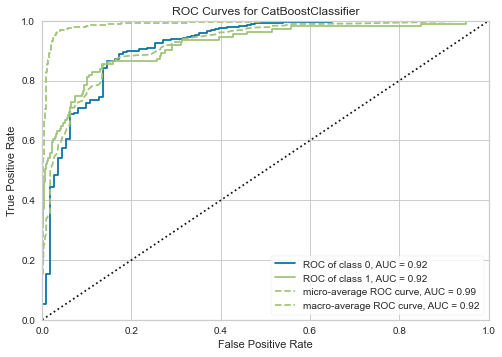

In [17]:
plot_model(tuned_catboost, plot = 'auc')

### 10.2 Precision-Recall Curve

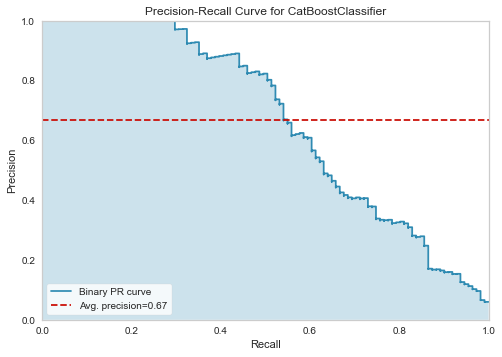

In [18]:
plot_model(tuned_catboost, plot = 'pr')

### 10.3 Feature Importance Plot

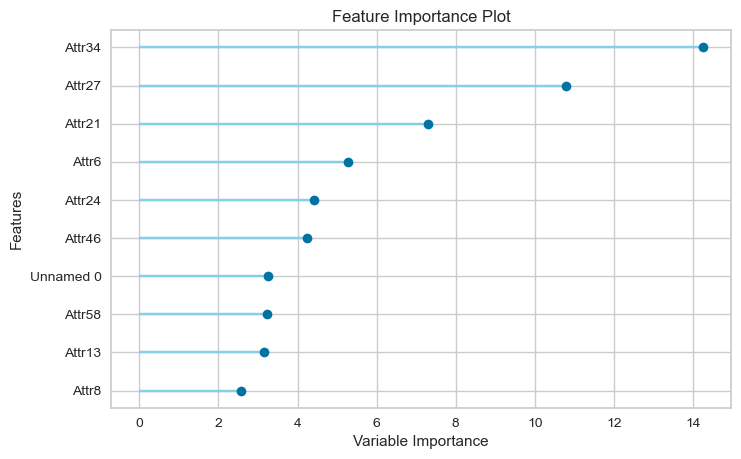

In [19]:
plot_model(tuned_catboost, plot='feature')

### 10.4 Confusion Matrix

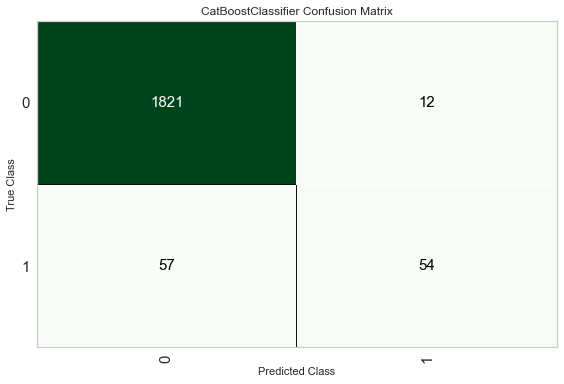

In [20]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [21]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

In [22]:
predict_model(tuned_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9645,0.9192,0.4865,0.8182,0.6102,0.5928,0.6149


This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [23]:
final_catboost = finalize_model(tuned_catboost)

In [24]:
#Final Random Forest model parameters for deployment
print(final_catboost)

**Caution:** One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. 

In [25]:
predict_model(final_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9995,1.0000,0.9910,1.0000,0.9955,0.9952,0.9952


# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. 

In [26]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,Label,Score
0,5,0.152550,0.47011,0.018859,1.0406,-39.9980,0.000000,0.152550,1.12720,1.9155,...,0.81964,0.000000,10.4360,6.5827,88.464,4.1260,3.7058,0.0,0.0,0.9999
1,11,0.056009,0.48351,0.047054,1.1005,-30.8950,0.056009,0.056009,1.06820,1.0281,...,0.97266,0.030049,10.3160,16.9280,59.064,6.1797,5.9635,1.0,1.0,0.9940
2,13,0.004603,0.52812,0.043685,1.2884,-18.3050,0.000000,0.006654,0.89353,1.4128,...,0.99529,0.798200,13.7700,16.0330,39.130,9.3279,1.7553,0.0,0.0,0.9944
3,18,0.038360,0.38974,0.285340,1.9692,-8.4639,0.160020,0.051804,1.56580,2.2331,...,0.97685,0.154580,6.7651,10.0010,48.119,7.5854,5.3137,0.0,0.0,0.9991
4,57,0.011846,0.18761,0.016834,1.1081,-6.3450,0.000000,0.018625,4.33010,1.5691,...,0.78842,0.037357,33.2680,13.8420,36.214,10.0790,1.8955,1.0,0.0,0.6190


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `default` available. To do that we will use `pycaret.utils` module. See example below:

In [27]:
check_metric(unseen_predictions['class'],unseen_predictions['Label'].astype('float32'), metric = 'Accuracy')

0.9619